No need to look at CPU

use rpod active memory usage dist

node user count in cluster health (Ram and cpu is addisgned to the node and available)

CPU commitment


Just remove all storage to get variable memory

cost is based on user node count - directly proportional to numebr of nodes 

users influsence nodes

promt ql

In [264]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from functools import reduce
import warnings

In [265]:
!pwd

/Users/shashank/Desktop/BIDS/datahub_usage/grafana-analysis copy/notebooks


This is a Jan 21 costs data. 

In [266]:
jan21 = pd.read_csv("../data/GCP/21-01.csv", skiprows = 7)
jan21

,Billing account name,Billing account ID,Project name,Project ID,Service description,Service ID,SKU description,SKU ID,Credit type,Cost type,Usage start date,Usage end date,Usage amount,Usage unit,Unrounded Cost ($),Cost ($),Unnamed: 16
0,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Balanced PD Capacity,6AE1-525F-8B80,NaN,Usage,2021-01-01,2021-01-31,"22,732.651",gibibyte month,2273.264728,2273.26,NaN
1,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-01,2021-01-31,"44,232.23",hour,1398.224622,1398.22,NaN
2,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-08,2021-01-31,"38,637.833",hour,1221.380316,1221.38,NaN
3,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-01,2021-01-31,"286,551.741",gibibyte hour,1214.119313,1214.12,NaN
4,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-08,2021-01-31,"243,919.773",gibibyte hour,1033.487876,1033.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,SUSTAINED_USAGE_DISCOUNT,Usage,2021-01-08,2021-01-31,NaN,NaN,-494.847179,-494.85,NaN
135,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,SUSTAINED_USAGE_DISCOUNT,Usage,2021-01-08,2021-01-31,NaN,NaN,-579.926026,-579.93,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rounding error,NaN,NaN,NaN,NaN,-0.016631,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rounding error,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


First filter for overall datahub expenses. (the rest is  for Data8X on EdX)

In [267]:
jan21_datahub = jan21[jan21["Project name"] == "ucb-datahub-2018"]
jan21_datahub

,Billing account name,Billing account ID,Project name,Project ID,Service description,Service ID,SKU description,SKU ID,Credit type,Cost type,Usage start date,Usage end date,Usage amount,Usage unit,Unrounded Cost ($),Cost ($),Unnamed: 16
0,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Balanced PD Capacity,6AE1-525F-8B80,NaN,Usage,2021-01-01,2021-01-31,"22,732.651",gibibyte month,2273.264728,2273.26,NaN
1,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-01,2021-01-31,"44,232.23",hour,1398.224622,1398.22,NaN
2,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-08,2021-01-31,"38,637.833",hour,1221.380316,1221.38,NaN
3,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-01,2021-01-31,"286,551.741",gibibyte hour,1214.119313,1214.12,NaN
4,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-08,2021-01-31,"243,919.773",gibibyte hour,1033.487876,1033.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Network Inter Zone Ingress,D0CC-50DF-59D2,NaN,Usage,2021-01-01,2021-01-31,"1,844.249",gibibyte,0.000000,0.00,NaN
132,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,E2 Instance Ram running in Americas,F449-33EC-A5EF,COMMITTED_USAGE_DISCOUNT,Usage,2021-01-01,2021-01-31,NaN,NaN,-209.408635,-209.41,NaN
133,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,E2 Instance Core running in Americas,CF4E-A0C7-E3BF,COMMITTED_USAGE_DISCOUNT,Usage,2021-01-01,2021-01-31,NaN,NaN,-259.645377,-259.65,NaN
134,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,SUSTAINED_USAGE_DISCOUNT,Usage,2021-01-08,2021-01-31,NaN,NaN,-494.847179,-494.85,NaN


In [268]:
jan21_datahub["Usage unit"].value_counts()

gibibyte               41
hour                   13
gibibyte month          6
gibibyte hour           6
count                   2
active key versions     1
Name: Usage unit, dtype: int64

The grafana data is of 2 types: variable (realted to usage) and fixed (realted to storage). It is also divided by hubs. I will try to show what protioion of costs are attributed to which hub on a given day.

I will show the split on Jan 21 as a sample.

### Storage costs with the usage unit gibibyte month

Storage costs are significant. They are 40% for Jan 21.

In [269]:
jan21_datahub[jan21_datahub["Usage unit"] == "gibibyte month"]

,Billing account name,Billing account ID,Project name,Project ID,Service description,Service ID,SKU description,SKU ID,Credit type,Cost type,Usage start date,Usage end date,Usage amount,Usage unit,Unrounded Cost ($),Cost ($),Unnamed: 16
0,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Balanced PD Capacity,6AE1-525F-8B80,NaN,Usage,2021-01-01,2021-01-31,"22,732.651",gibibyte month,2273.264728,2273.26,NaN
5,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,SSD backed PD Capacity,B188-61DD-52E4,NaN,Usage,2021-01-01,2021-01-31,"3,685.205",gibibyte month,626.484423,626.48,NaN
6,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Storage Machine Image,A652-E97D-AB77,NaN,Usage,2021-01-01,2021-01-31,"8,902.764",gibibyte month,445.138029,445.14,NaN
7,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Storage PD Capacity,D973-5D65-BAB2,NaN,Usage,2021-01-01,2021-01-31,"10,384.891",gibibyte month,414.850057,414.85,NaN
9,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Storage PD Snapshot in US,34CF-7D88-5D40,NaN,Usage,2021-01-01,2021-01-31,"12,106.928",gibibyte month,314.779513,314.78,NaN
28,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Cloud Storage,95FF-2EF5-5EA1,Standard Storage US Multi-region,0D5D-6E23-4250,NaN,Usage,2021-01-01,2021-01-31,771.23,gibibyte month,20.051943,20.05,NaN


In [270]:
jan21_datahub[jan21_datahub["Usage unit"] != "gibibyte month"]

,Billing account name,Billing account ID,Project name,Project ID,Service description,Service ID,SKU description,SKU ID,Credit type,Cost type,Usage start date,Usage end date,Usage amount,Usage unit,Unrounded Cost ($),Cost ($),Unnamed: 16
1,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-01,2021-01-31,"44,232.23",hour,1398.224622,1398.22,NaN
2,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-01-08,2021-01-31,"38,637.833",hour,1221.380316,1221.38,NaN
3,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-01,2021-01-31,"286,551.741",gibibyte hour,1214.119313,1214.12,NaN
4,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-01-08,2021-01-31,"243,919.773",gibibyte hour,1033.487876,1033.49,NaN
10,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,E2 Instance Core running in Americas,CF4E-A0C7-E3BF,NaN,Usage,2021-01-01,2021-01-31,"13,950.624",hour,304.285043,304.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Network Inter Zone Ingress,D0CC-50DF-59D2,NaN,Usage,2021-01-01,2021-01-31,"1,844.249",gibibyte,0.000000,0.00,NaN
132,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,E2 Instance Ram running in Americas,F449-33EC-A5EF,COMMITTED_USAGE_DISCOUNT,Usage,2021-01-01,2021-01-31,NaN,NaN,-209.408635,-209.41,NaN
133,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,E2 Instance Core running in Americas,CF4E-A0C7-E3BF,COMMITTED_USAGE_DISCOUNT,Usage,2021-01-01,2021-01-31,NaN,NaN,-259.645377,-259.65,NaN
134,Data Hub,01A56A-FF37DD-411346,ucb-datahub-2018,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,SUSTAINED_USAGE_DISCOUNT,Usage,2021-01-08,2021-01-31,NaN,NaN,-494.847179,-494.85,NaN


Loading all costs data. We have monthyly costs from Jan 2020 to April 2021.

In [271]:
mypath = "../data/GCP/"
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])
if ".DS_Store" in onlyfiles:
    onlyfiles.remove(".DS_Store")
dates = [i[:-4] for i in onlyfiles]
dates

['20-01',
 '20-02',
 '20-03',
 '20-04',
 '20-05',
 '20-06',
 '20-07',
 '20-08',
 '20-09',
 '20-10',
 '20-11',
 '20-12',
 '21-01',
 '21-02',
 '21-03',
 '21-04']

In [272]:
master = []
for i in onlyfiles:
    try:
        temp = pd.read_csv("../data/GCP/"+ i)
        master.append(temp)
    except:
        temp = pd.read_csv("../data/GCP/"+ i, skiprows = 7)
        master.append(temp)
for i in master:
    assert i.columns[0] == 'Billing account name'

In [273]:
monthly_total = [i["Cost ($)"].values[-1] for i in master]
monthly_total

[1543.98,
 9657.92,
 8963.32,
 9500.6,
 8703.92,
 7226.46,
 7724.96,
 8960.75,
 13627.72,
 11676.4,
 9178.16,
 8407.32,
 9776.2,
 11324.27,
 11736.02,
 13879.07]

In [274]:
master[-1]

,Billing account name,Billing account ID,Project name,Project ID,Service description,Service ID,SKU description,SKU ID,Credit type,Cost type,Usage start date,Usage end date,Usage amount,Usage unit,Unrounded Cost ($),Cost ($),Unnamed: 16
0,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,Balanced PD Capacity,6AE1-525F-8B80,NaN,Usage,2021-04-01,2021-04-30,"29,030.716",gibibyte month,2903.071068,2903.07,NaN
1,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-04-01,2021-04-30,"83,000.989",hour,2623.743501,2623.74,NaN
2,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-04-01,2021-04-30,"524,900.827",gibibyte hour,2224.003487,2224.00,NaN
3,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,NaN,Usage,2021-04-08,2021-04-30,"63,991.732",hour,2022.842255,2022.84,NaN
4,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,NaN,Usage,2021-04-08,2021-04-30,"422,640.194",gibibyte hour,1790.725776,1790.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Ram running in Americas,6C71-E844-38BC,SUSTAINED_USAGE_DISCOUNT,Usage,2021-04-08,2021-04-30,NaN,NaN,-1024.794598,-1024.79,NaN
147,NaN,NaN,NaN,ucb-datahub-2018,Compute Engine,6F81-5844-456A,N1 Predefined Instance Core running in Americas,2E27-4F75-95CD,SUSTAINED_USAGE_DISCOUNT,Usage,2021-04-08,2021-04-30,NaN,NaN,-1187.790731,-1187.79,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rounding error,NaN,NaN,NaN,NaN,0.000835,0.00,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rounding error,NaN,NaN,NaN,NaN,0.000000,0.00,NaN


In [275]:
datahub = [i[i["Project name"] == "ucb-datahub-2018"] for i in master]
datahub[-1] = master[-1][master[-1]["Project ID"] == "ucb-datahub-2018"]

In [276]:
jan21_datahub[jan21_datahub["Usage unit"] != "gibibyte month"]

USAGE = [i[i["Usage unit"] != "gibibyte month"] for i in datahub]

In [277]:
USAGE_costs = [i["Cost ($)"].sum() for i in USAGE]
USAGE_costs

[1037.96,
 5593.32,
 4961.4800000000005,
 5217.420000000001,
 4601.049999999999,
 3419.73,
 3368.8199999999997,
 3115.3399999999992,
 8901.240000000002,
 6935.100000000001,
 4645.26,
 3726.8599999999997,
 4635.34,
 6101.009999999999,
 6506.060000000001,
 8438.39]

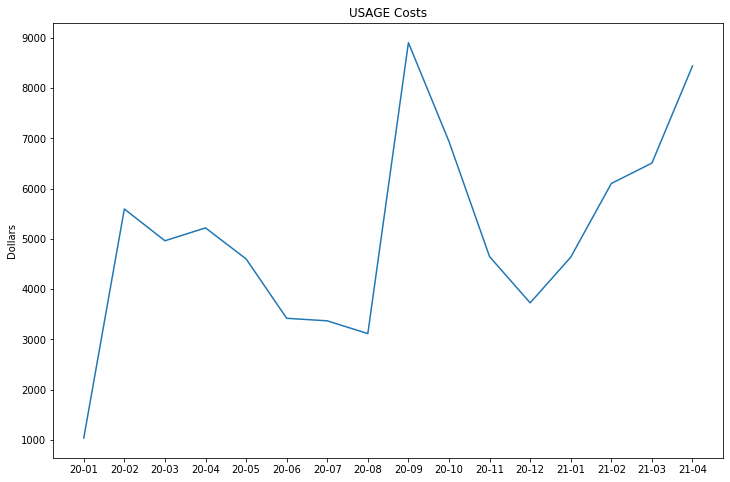

In [278]:
plt.figure(figsize = (12,8))
plt.plot(dates, USAGE_costs)
plt.title("USAGE Costs")
plt.ylabel("Dollars");

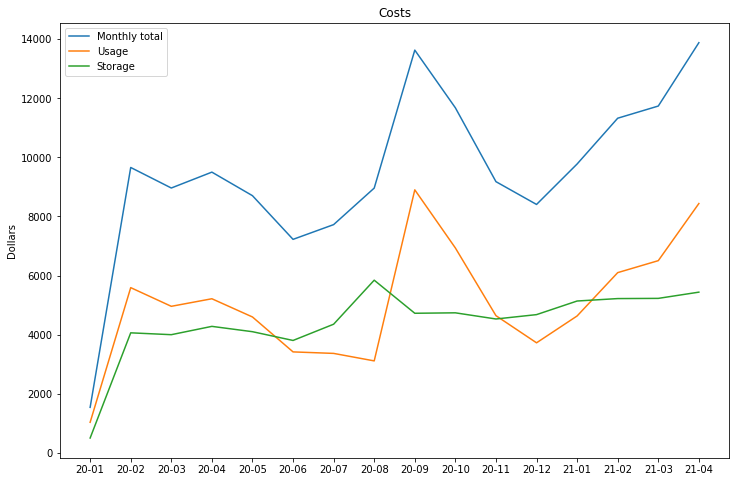

In [279]:
plt.figure(figsize = (12,8))
plt.plot(dates, monthly_total, label = "Monthly total")
plt.plot(dates, USAGE_costs, label = "Usage")
plt.plot(dates, np.array(monthly_total) - np.array(USAGE_costs), label = "Storage")
plt.title("Costs")
plt.ylabel("Dollars")
plt.legend();

Storage Costs are usually quite stable.

### Memory usage

Some hubs had no data like stat89a, genomics, utoronto hub
Buds hub was doing something weird.

In [280]:
hubs = listdir("../data/grafana")
if ".DS_Store" in hubs:
    hubs.remove(".DS_Store")
hubs  

['prob140hub',
 'datahub',
 'data100hub',
 'data102hub',
 'rhub',
 'eecshub',
 'biology']

In [281]:
memory = []
for hub in hubs:
    l = listdir("../data/grafana/" + hub)
    name = [i for i in l if 'memory' in i][0]
    temp = pd.read_csv("../data/grafana/" + hub + "/" + name)
    
    assert temp.columns[0] == 'Time'
    assert temp.columns[1] == 'Value'
    
    temp.columns = ["Time", hub]
    temp["Time"] = pd.to_datetime(temp["Time"])
    memory.append(temp)

In [282]:
for i in range(1, len(memory)):
    try:
        assert memory[0]["Time"].where(memory[0]["Time"].values == memory[i]["Time"].values).notna().sum() == 363
    except:
        print(hubs[i])

We can now merge the data on time axis. Note, for a given date data is recorded on multiple timestamps. So we only have value on that timestamp as a flow variable.

In [283]:
memory_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'],
                                            how='outer'), memory)
memory_merged["date"] = memory_merged.Time.dt.date
memory_merged["weekday"] = memory_merged.Time.dt.weekday
memory_merged

,Time,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,date,weekday
0,2020-11-28 11:00:00,1.416839e+09,23808622592,7.814414e+10,NaN,7.875240e+09,4.631593e+09,1.475871e+08,2020-11-28,5
1,2020-11-28 23:00:00,8.239964e+08,35786727424,2.102537e+11,NaN,9.146434e+09,8.088453e+09,1.103541e+10,2020-11-28,5
2,2020-11-29 11:00:00,9.209774e+08,26817474560,9.236821e+10,9.871360e+05,2.060519e+10,3.665273e+09,8.438813e+09,2020-11-29,6
3,2020-11-29 23:00:00,5.613650e+08,61166915584,3.412306e+11,2.603590e+09,3.107040e+10,1.018678e+10,1.424495e+10,2020-11-29,6
4,2020-11-30 11:00:00,2.478088e+09,65308340224,1.979885e+11,3.118146e+09,6.665164e+10,6.090430e+10,5.202842e+09,2020-11-30,0
...,...,...,...,...,...,...,...,...,...,...
358,2021-05-26 12:00:00,NaN,16913166336,2.368004e+09,NaN,5.063999e+09,5.569167e+08,NaN,2021-05-26,2
359,2021-05-27 00:00:00,NaN,9845276672,1.772655e+09,NaN,2.641068e+09,1.029554e+09,NaN,2021-05-27,3
360,2021-05-27 12:00:00,NaN,10697764864,3.430040e+09,NaN,3.522626e+09,2.768732e+08,NaN,2021-05-27,3
361,2021-05-28 00:00:00,5.538775e+08,3571597312,4.337029e+09,2.072576e+08,2.552619e+09,NaN,NaN,2021-05-28,4


Since we care about the proportion of costs attributed to hub, if we take the sum of usage from timestamps of a hub for a day, we will still get an unbiased estimate for proportion.
Sum is fine because timestamps are 12 hours apart.

In [284]:
memory_daily_raw = memory_merged.groupby("date").sum().drop(columns = ["weekday"])
memory_daily_raw["daily_total"] = memory_daily_raw.sum(axis = 1)
memory_daily_raw = memory_daily_raw.reset_index()
memory_daily_raw["date"] = pd.to_datetime(memory_daily_raw["date"]).dt.date
memory_daily_raw

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total
0,2020-11-28,2.240836e+09,59595350016,2.883979e+11,0.000000e+00,1.702167e+10,1.272005e+10,1.118299e+10,3.911588e+11
1,2020-11-29,1.482342e+09,87984390144,4.335988e+11,2.604577e+09,5.167559e+10,1.385206e+10,2.268376e+10,6.138815e+11
2,2020-11-30,3.408335e+09,154516267008,6.570972e+11,6.188868e+09,9.407759e+10,8.486781e+10,1.655950e+10,1.016716e+12
3,2020-12-01,5.195342e+09,199730864128,1.389111e+11,7.268770e+09,5.868444e+10,7.453029e+10,5.907763e+09,4.902286e+11
4,2020-12-02,4.111827e+09,255978471424,1.611774e+11,4.645306e+09,1.033423e+11,7.292554e+10,6.248960e+09,6.084298e+11
...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000e+00,15807553536,3.357909e+09,0.000000e+00,7.274824e+09,2.840166e+08,0.000000e+00,2.672430e+10
178,2021-05-25,0.000000e+00,27431530496,8.282153e+09,2.872934e+08,1.165743e+10,2.069791e+08,0.000000e+00,4.786539e+10
179,2021-05-26,0.000000e+00,30071894016,5.077311e+09,0.000000e+00,8.082690e+09,1.313513e+09,0.000000e+00,4.454541e+10
180,2021-05-27,0.000000e+00,20543041536,5.202694e+09,0.000000e+00,6.163694e+09,1.306427e+09,0.000000e+00,3.321586e+10


The hub values are the sum of recorded usage on that day used as a proxy for the actual usage of the day. The Daily total is the sum of all hubs for the day.

In the following table, i divide a hubs value for a given day to calculate the proportion for the total usage for the day.

In [285]:
memory_daily = memory_merged.groupby("date").sum().drop(columns = ["weekday"])
daily_total = memory_daily.sum(axis = 1)
for col in memory_daily.columns:
    memory_daily[col] = memory_daily[col]/daily_total
memory_daily["daily_total"] = daily_total.values
memory_daily = memory_daily.reset_index()
memory_daily["date"] = pd.to_datetime(memory_daily["date"])
memory_daily

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total
0,2020-11-28,0.005729,0.152356,0.737291,0.000000,0.043516,0.032519,0.028589,3.911588e+11
1,2020-11-29,0.002415,0.143325,0.706323,0.004243,0.084178,0.022565,0.036951,6.138815e+11
2,2020-11-30,0.003352,0.151976,0.646294,0.006087,0.092531,0.083473,0.016287,1.016716e+12
3,2020-12-01,0.010598,0.407424,0.283360,0.014827,0.119708,0.152032,0.012051,4.902286e+11
4,2020-12-02,0.006758,0.420720,0.264907,0.007635,0.169851,0.119859,0.010271,6.084298e+11
...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000,0.591505,0.125650,0.000000,0.272218,0.010628,0.000000,2.672430e+10
178,2021-05-25,0.000000,0.573097,0.173030,0.006002,0.243546,0.004324,0.000000,4.786539e+10
179,2021-05-26,0.000000,0.675084,0.113981,0.000000,0.181448,0.029487,0.000000,4.454541e+10
180,2021-05-27,0.000000,0.618471,0.156633,0.000000,0.185565,0.039331,0.000000,3.321586e+10


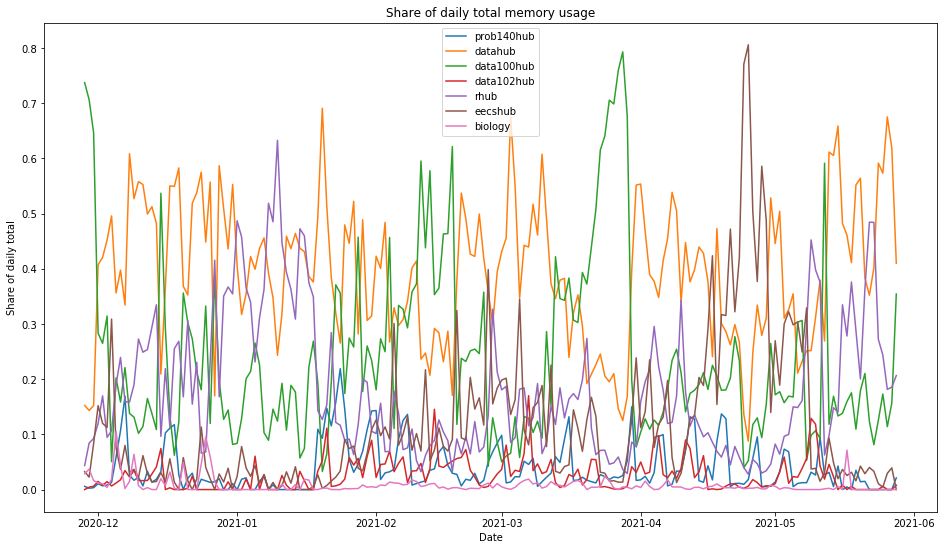

In [286]:
plt.figure(figsize = (16,9))
for col in hubs:
    plt.plot(memory_daily["date"].values, memory_daily[col].values, label = col)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Share of daily total")
plt.title("Share of daily total memory usage");

Note

The main Datahub has the most usage in 1 day with a relatively constant share.

Eecs hub spiked this semester (spring 2021)

Data100 spikes at certain times

In [287]:
# Avg daily proportion for the entire period
memory_daily.describe().iloc[1:3]

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total
mean,0.038379,0.392539,0.238311,0.026139,0.180772,0.115866,0.007995,4.254329e+11
std,0.043756,0.126585,0.163456,0.029451,0.124959,0.135381,0.014864,3.670972e+11


In [288]:
memory_daily["month"] = memory_daily.date.dt.month
memory_daily["weekday"] = memory_daily.date.dt.weekday
memory_daily

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday
0,2020-11-28,0.005729,0.152356,0.737291,0.000000,0.043516,0.032519,0.028589,3.911588e+11,11,5
1,2020-11-29,0.002415,0.143325,0.706323,0.004243,0.084178,0.022565,0.036951,6.138815e+11,11,6
2,2020-11-30,0.003352,0.151976,0.646294,0.006087,0.092531,0.083473,0.016287,1.016716e+12,11,0
3,2020-12-01,0.010598,0.407424,0.283360,0.014827,0.119708,0.152032,0.012051,4.902286e+11,12,1
4,2020-12-02,0.006758,0.420720,0.264907,0.007635,0.169851,0.119859,0.010271,6.084298e+11,12,2
...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000,0.591505,0.125650,0.000000,0.272218,0.010628,0.000000,2.672430e+10,5,0
178,2021-05-25,0.000000,0.573097,0.173030,0.006002,0.243546,0.004324,0.000000,4.786539e+10,5,1
179,2021-05-26,0.000000,0.675084,0.113981,0.000000,0.181448,0.029487,0.000000,4.454541e+10,5,2
180,2021-05-27,0.000000,0.618471,0.156633,0.000000,0.185565,0.039331,0.000000,3.321586e+10,5,3


Over here, i calcuate `monthly_sum`. This is the sum of the `daily_total` usage for the month.

In [289]:
memory_daily = memory_daily.join(memory_daily.groupby('month')['daily_total'].sum(), on='month', rsuffix='_r')
memory_daily = memory_daily.rename(columns = {"daily_total_r": "monthly_sum"})
memory_daily

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday,monthly_sum
0,2020-11-28,0.005729,0.152356,0.737291,0.000000,0.043516,0.032519,0.028589,3.911588e+11,11,5,2.021756e+12
1,2020-11-29,0.002415,0.143325,0.706323,0.004243,0.084178,0.022565,0.036951,6.138815e+11,11,6,2.021756e+12
2,2020-11-30,0.003352,0.151976,0.646294,0.006087,0.092531,0.083473,0.016287,1.016716e+12,11,0,2.021756e+12
3,2020-12-01,0.010598,0.407424,0.283360,0.014827,0.119708,0.152032,0.012051,4.902286e+11,12,1,5.135129e+12
4,2020-12-02,0.006758,0.420720,0.264907,0.007635,0.169851,0.119859,0.010271,6.084298e+11,12,2,5.135129e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000,0.591505,0.125650,0.000000,0.272218,0.010628,0.000000,2.672430e+10,5,0,4.501847e+12
178,2021-05-25,0.000000,0.573097,0.173030,0.006002,0.243546,0.004324,0.000000,4.786539e+10,5,1,4.501847e+12
179,2021-05-26,0.000000,0.675084,0.113981,0.000000,0.181448,0.029487,0.000000,4.454541e+10,5,2,4.501847e+12
180,2021-05-27,0.000000,0.618471,0.156633,0.000000,0.185565,0.039331,0.000000,3.321586e+10,5,3,4.501847e+12


Here I take the share a day of the usage for the month.

In [290]:
memory_daily["share_of_month"] = memory_daily.daily_total / memory_daily.monthly_sum
memory_daily

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday,monthly_sum,share_of_month
0,2020-11-28,0.005729,0.152356,0.737291,0.000000,0.043516,0.032519,0.028589,3.911588e+11,11,5,2.021756e+12,0.193475
1,2020-11-29,0.002415,0.143325,0.706323,0.004243,0.084178,0.022565,0.036951,6.138815e+11,11,6,2.021756e+12,0.303638
2,2020-11-30,0.003352,0.151976,0.646294,0.006087,0.092531,0.083473,0.016287,1.016716e+12,11,0,2.021756e+12,0.502887
3,2020-12-01,0.010598,0.407424,0.283360,0.014827,0.119708,0.152032,0.012051,4.902286e+11,12,1,5.135129e+12,0.095466
4,2020-12-02,0.006758,0.420720,0.264907,0.007635,0.169851,0.119859,0.010271,6.084298e+11,12,2,5.135129e+12,0.118484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000,0.591505,0.125650,0.000000,0.272218,0.010628,0.000000,2.672430e+10,5,0,4.501847e+12,0.005936
178,2021-05-25,0.000000,0.573097,0.173030,0.006002,0.243546,0.004324,0.000000,4.786539e+10,5,1,4.501847e+12,0.010632
179,2021-05-26,0.000000,0.675084,0.113981,0.000000,0.181448,0.029487,0.000000,4.454541e+10,5,2,4.501847e+12,0.009895
180,2021-05-27,0.000000,0.618471,0.156633,0.000000,0.185565,0.039331,0.000000,3.321586e+10,5,3,4.501847e+12,0.007378


(We also dont have costs for May)

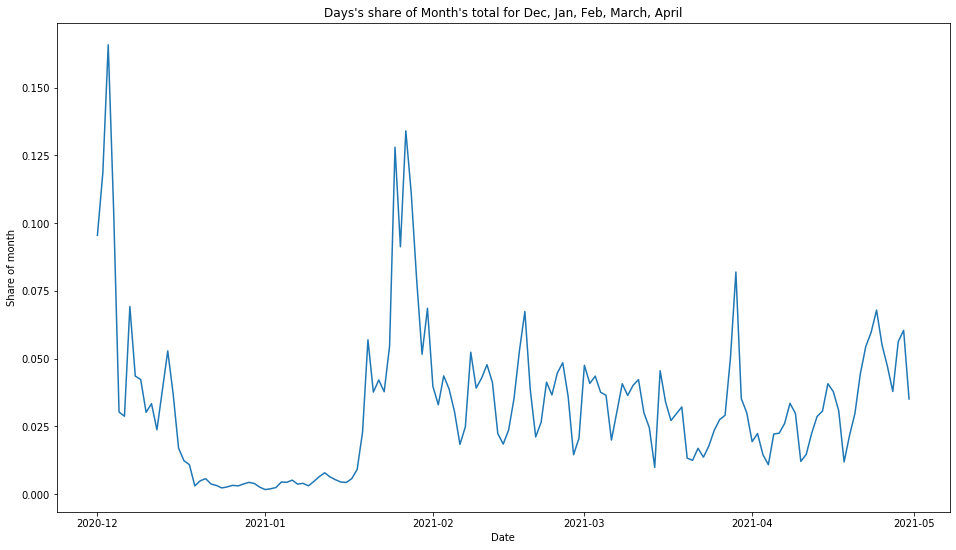

In [291]:
temp = memory_daily[memory_daily.month.isin([12, 1 ,2,3,4])]
plt.figure(figsize = (16,9))
plt.plot(temp["date"].values, temp["share_of_month"].values)
plt.xlabel("Date")
plt.ylabel("Share of month")
plt.title("Days's share of Month's total for Dec, Jan, Feb, March, April");

In [292]:
feat = ["month", "weekday" , "monthly_sum" , "share_of_month"]
for f in feat:
    memory_daily_raw[f] = memory_daily[f]
memory_daily_raw

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday,monthly_sum,share_of_month
0,2020-11-28,2.240836e+09,59595350016,2.883979e+11,0.000000e+00,1.702167e+10,1.272005e+10,1.118299e+10,3.911588e+11,11,5,2.021756e+12,0.193475
1,2020-11-29,1.482342e+09,87984390144,4.335988e+11,2.604577e+09,5.167559e+10,1.385206e+10,2.268376e+10,6.138815e+11,11,6,2.021756e+12,0.303638
2,2020-11-30,3.408335e+09,154516267008,6.570972e+11,6.188868e+09,9.407759e+10,8.486781e+10,1.655950e+10,1.016716e+12,11,0,2.021756e+12,0.502887
3,2020-12-01,5.195342e+09,199730864128,1.389111e+11,7.268770e+09,5.868444e+10,7.453029e+10,5.907763e+09,4.902286e+11,12,1,5.135129e+12,0.095466
4,2020-12-02,4.111827e+09,255978471424,1.611774e+11,4.645306e+09,1.033423e+11,7.292554e+10,6.248960e+09,6.084298e+11,12,2,5.135129e+12,0.118484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.000000e+00,15807553536,3.357909e+09,0.000000e+00,7.274824e+09,2.840166e+08,0.000000e+00,2.672430e+10,5,0,4.501847e+12,0.005936
178,2021-05-25,0.000000e+00,27431530496,8.282153e+09,2.872934e+08,1.165743e+10,2.069791e+08,0.000000e+00,4.786539e+10,5,1,4.501847e+12,0.010632
179,2021-05-26,0.000000e+00,30071894016,5.077311e+09,0.000000e+00,8.082690e+09,1.313513e+09,0.000000e+00,4.454541e+10,5,2,4.501847e+12,0.009895
180,2021-05-27,0.000000e+00,20543041536,5.202694e+09,0.000000e+00,6.163694e+09,1.306427e+09,0.000000e+00,3.321586e+10,5,3,4.501847e+12,0.007378


I have added a column for weekday. 0 is monday, 6 sunday. This is to check which day of the week has greatest usage.

Following is average usage on a given weekday.

In [293]:
weekday_raw = memory_daily_raw.groupby("weekday").mean().drop(columns = ["month","monthly_sum","share_of_month"])
weekday_raw

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total
weekday,,,,,,,,
0,3.902397e+10,1.630716e+11,1.371942e+11,1.381342e+10,5.438285e+10,7.703466e+10,2.485720e+09,4.870064e+11
1,2.669446e+10,1.548689e+11,9.883857e+10,1.320934e+10,5.395701e+10,6.144353e+10,2.581704e+09,4.115935e+11
2,9.498460e+09,2.105198e+11,1.166868e+11,1.247920e+10,4.338498e+10,1.016597e+11,3.166415e+09,4.973954e+11
3,1.076908e+10,1.898163e+11,1.786283e+11,1.779020e+10,4.525947e+10,8.716765e+10,2.669979e+09,5.321010e+11
4,1.249207e+10,1.649677e+11,9.580453e+10,8.025645e+09,5.703333e+10,1.021733e+11,3.491033e+09,4.439877e+11
5,1.008132e+10,8.364611e+10,7.962656e+10,6.255957e+09,3.899356e+10,8.071220e+10,2.391617e+09,3.017073e+11
6,1.615244e+10,8.802589e+10,8.705400e+10,1.441163e+10,3.565448e+10,6.034390e+10,2.596368e+09,3.042387e+11


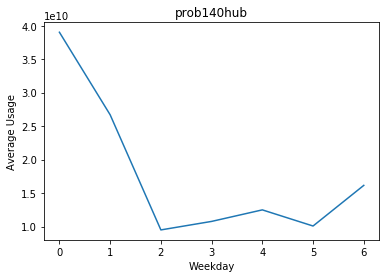

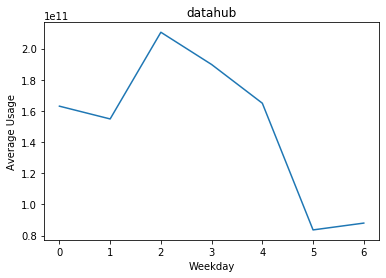

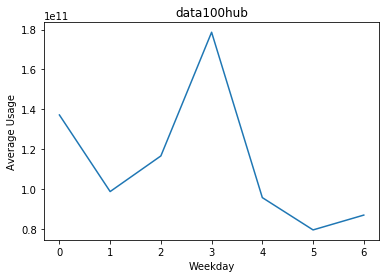

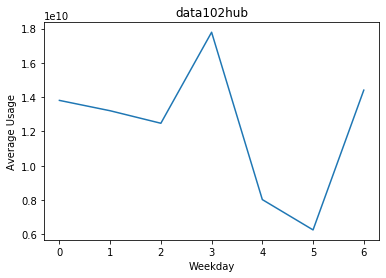

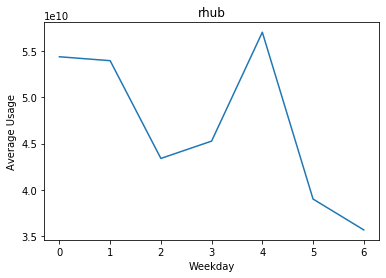

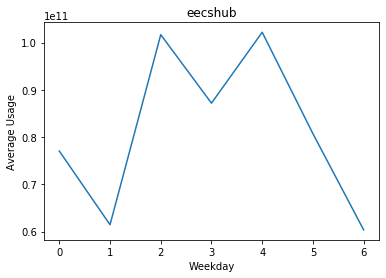

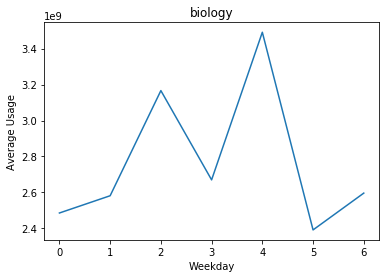

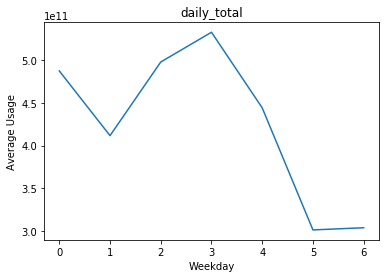

In [294]:
for col in weekday_raw.columns:
    plt.figure()
    plt.plot(weekday_raw.index.values, weekday_raw[col], label = col)
    plt.xlabel("Weekday")
    plt.ylabel("Average Usage")
    plt.title(col);

### COSTS and USAGE

Now, we will compare Costs to the usage figures

In [295]:
# ram costa calcuated for the month earlier
list(zip(dates, USAGE_costs))

[('20-01', 1037.96),
 ('20-02', 5593.32),
 ('20-03', 4961.4800000000005),
 ('20-04', 5217.420000000001),
 ('20-05', 4601.049999999999),
 ('20-06', 3419.73),
 ('20-07', 3368.8199999999997),
 ('20-08', 3115.3399999999992),
 ('20-09', 8901.240000000002),
 ('20-10', 6935.100000000001),
 ('20-11', 4645.26),
 ('20-12', 3726.8599999999997),
 ('21-01', 4635.34),
 ('21-02', 6101.009999999999),
 ('21-03', 6506.060000000001),
 ('21-04', 8438.39)]

In [296]:
mapping = pd.DataFrame(zip([11,12,1,2,3, 4], USAGE_costs[10:]))
mapping.columns = ["month", "monthy_cost"]
mapping

,month,monthy_cost
0,11,4645.26
1,12,3726.86
2,1,4635.34
3,2,6101.01
4,3,6506.06
5,4,8438.39


In [297]:
usage_costs = memory_daily.merge(mapping)
usage_costs = usage_costs[usage_costs.month != 11]
usage_costs

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday,monthly_sum,share_of_month,monthy_cost
3,2020-12-01,0.010598,0.407424,0.283360,0.014827,0.119708,0.152032,0.012051,4.902286e+11,12,1,5.135129e+12,0.095466,3726.86
4,2020-12-02,0.006758,0.420720,0.264907,0.007635,0.169851,0.119859,0.010271,6.084298e+11,12,2,5.135129e+12,0.118484,3726.86
5,2020-12-03,0.008218,0.451729,0.314393,0.014427,0.094637,0.112614,0.003982,8.514309e+11,12,3,5.135129e+12,0.165805,3726.86
6,2020-12-04,0.012809,0.495853,0.050615,0.006461,0.106373,0.308891,0.018998,5.380186e+11,12,4,5.135129e+12,0.104772,3726.86
7,2020-12-05,0.058480,0.356338,0.202356,0.011790,0.190111,0.075689,0.105236,1.554285e+11,12,5,5.135129e+12,0.030268,3726.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2021-04-26,0.056276,0.247394,0.117895,0.018065,0.054400,0.503452,0.002517,1.124084e+12,4,0,2.382848e+13,0.047174,8438.39
150,2021-04-27,0.095504,0.334268,0.129884,0.012578,0.046827,0.377031,0.003909,9.018660e+11,4,1,2.382848e+13,0.037848,8438.39
151,2021-04-28,0.005294,0.279332,0.094071,0.004542,0.029780,0.585903,0.001077,1.339570e+12,4,2,2.382848e+13,0.056217,8438.39
152,2021-04-29,0.005171,0.310713,0.154412,0.006871,0.034195,0.487252,0.001385,1.439869e+12,4,3,2.382848e+13,0.060426,8438.39


In the above table, I have `monthy_cost` for a month. Multiply it by `share_of_month` to get the costs for a day. Multiply it by `prob140_memory` to get the share of monthly costs attributed to prob140 hub for that day. Similarly for all hubs, as calcuated below,

In [298]:
cols = ['prob140hub', 'datahub', 'data100hub',
       'data102hub', 'rhub', 'eecshub', 'biology']
for col in cols:
    usage_costs[col] = usage_costs[col] * usage_costs.share_of_month * usage_costs.monthy_cost
usage_costs

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month,weekday,monthly_sum,share_of_month,monthy_cost
3,2020-12-01,3.770560,144.956233,100.815821,5.275366,42.590688,54.090941,4.287605,4.902286e+11,12,1,5.135129e+12,0.095466,3726.86
4,2020-12-02,2.984190,185.778373,116.975779,3.371367,75.001449,52.926277,4.535231,6.084298e+11,12,2,5.135129e+12,0.118484,3726.86
5,2020-12-03,5.078240,279.137874,194.273960,8.914779,58.479044,69.588116,2.460584,8.514309e+11,12,3,5.135129e+12,0.165805,3726.86
6,2020-12-04,5.001613,193.616341,19.763567,2.522648,41.535690,120.612983,7.418332,5.380186e+11,12,4,5.135129e+12,0.104772,3726.86
7,2020-12-05,6.596701,40.196157,22.826493,1.329919,21.445229,8.537957,11.870979,1.554285e+11,12,5,5.135129e+12,0.030268,3726.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2021-04-26,22.401907,98.480858,46.930936,7.191323,21.654986,200.410332,1.002082,1.124084e+12,4,0,2.382848e+13,0.047174,8438.39
150,2021-04-27,30.501851,106.757780,41.482205,4.017082,14.955545,120.415358,1.248445,9.018660e+11,4,1,2.382848e+13,0.037848,8438.39
151,2021-04-28,2.511403,132.510379,44.625788,2.154842,14.126890,277.942323,0.511138,1.339570e+12,4,2,2.382848e+13,0.056217,8438.39
152,2021-04-29,2.636522,158.433188,78.735119,3.503639,17.436243,248.450741,0.705983,1.439869e+12,4,3,2.382848e+13,0.060426,8438.39


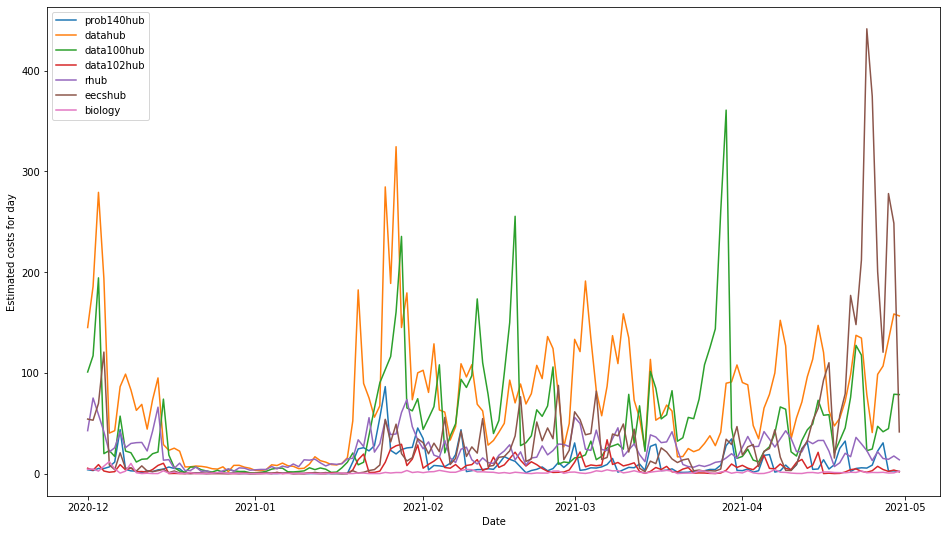

In [299]:
cols = ['prob140hub', 'datahub', 'data100hub',
       'data102hub', 'rhub', 'eecshub', 'biology']
plt.figure(figsize = (16,9))
for col in cols:
    plt.plot(usage_costs["date"].values, usage_costs[col].values, label = col)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Estimated costs for day");

Note: Data 100 costs surge in march. 

Datahub costs are high and periodic.

Use the following function to plot costs for any hub for any months.

In [300]:
def hub_month_cost(hubs, month, title = ""):
    temp = usage_costs[usage_costs.month.isin(month)]
    plt.figure(figsize = (16,9))
    for col in hubs:
        plt.plot(temp["date"].values, temp[col].values, label = col)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Estimated costs for day")
    plt.title(title);

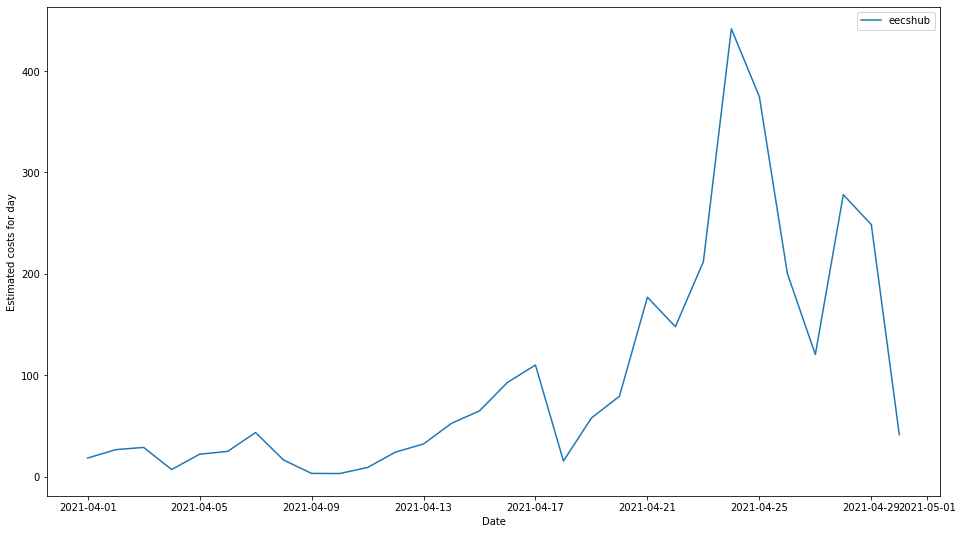

In [301]:
hub_month_cost(["eecshub"], [4],)

Note: The surge corresponds to Data 100 HW 7 and optional competition associated with the HW. It was  due spring break with no other assignment due. So we are safely say the usage over spring break was just due to this assignement.

In [303]:
usage_costs[(usage_costs.date >= datetime.date(year=2021,month=2,day=18)) & (
usage_costs.date < datetime.date(year=2021,month=2,day=25))].data100hub.sum()

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


538.3892247042074

Note: This is an upperbound for a general HW assignment.

We can sum the daily costs to get costs for the month.

In [304]:
usage_costs.iloc[:, 1:10]

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month
3,3.770560,144.956233,100.815821,5.275366,42.590688,54.090941,4.287605,4.902286e+11,12
4,2.984190,185.778373,116.975779,3.371367,75.001449,52.926277,4.535231,6.084298e+11,12
5,5.078240,279.137874,194.273960,8.914779,58.479044,69.588116,2.460584,8.514309e+11,12
6,5.001613,193.616341,19.763567,2.522648,41.535690,120.612983,7.418332,5.380186e+11,12
7,6.596701,40.196157,22.826493,1.329919,21.445229,8.537957,11.870979,1.554285e+11,12
...,...,...,...,...,...,...,...,...,...
149,22.401907,98.480858,46.930936,7.191323,21.654986,200.410332,1.002082,1.124084e+12,4
150,30.501851,106.757780,41.482205,4.017082,14.955545,120.415358,1.248445,9.018660e+11,4
151,2.511403,132.510379,44.625788,2.154842,14.126890,277.942323,0.511138,1.339570e+12,4
152,2.636522,158.433188,78.735119,3.503639,17.436243,248.450741,0.705983,1.439869e+12,4


In [309]:
usage_costs_month = usage_costs.iloc[:, 1:10].groupby("month", sort=False).sum().drop(columns = "daily_total")
usage_costs_month[2:].round()

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
2,265.0,2129.0,2037.0,230.0,558.0,841.0,42.0
3,270.0,2379.0,2109.0,201.0,745.0,754.0,48.0
4,309.0,2799.0,1394.0,168.0,762.0,2973.0,34.0


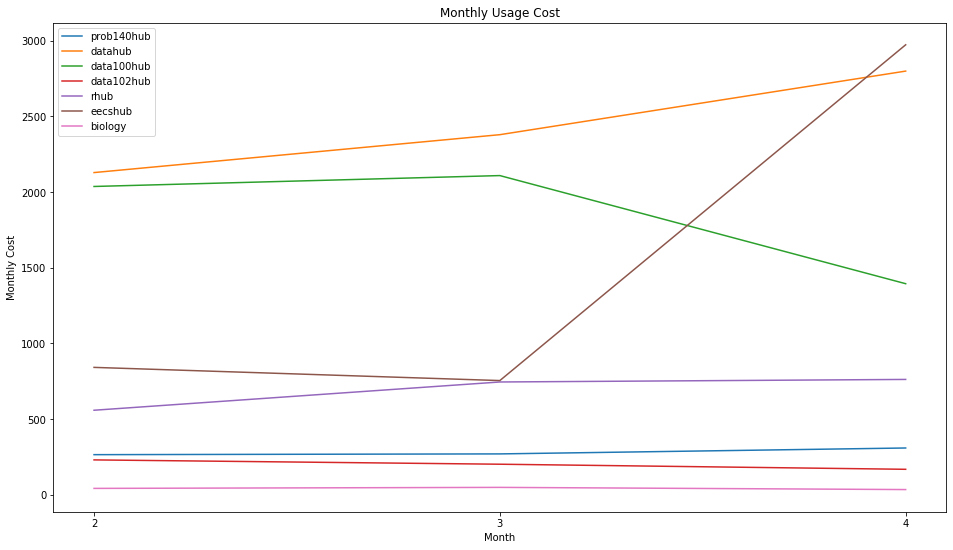

In [308]:
plt.figure(figsize = (16,9))
for col in usage_costs_month.columns:
    plt.plot([str(i) for i in usage_costs_month.index.values][2:], usage_costs_month[col].values[2:], label = col)
plt.legend()
plt.title("Monthly Usage Cost")
plt.xlabel("Month")
plt.ylabel("Monthly Cost");

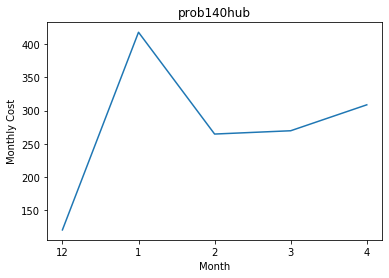

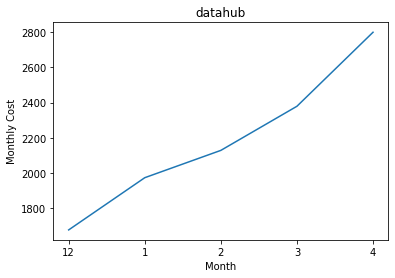

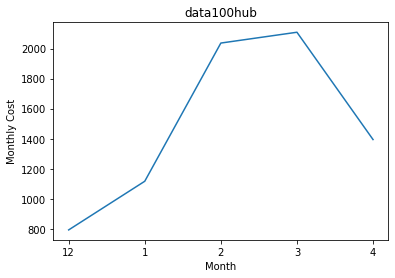

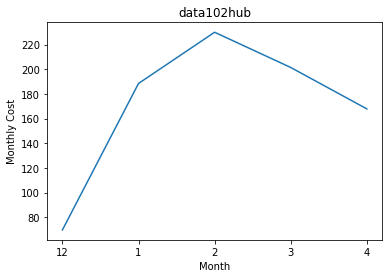

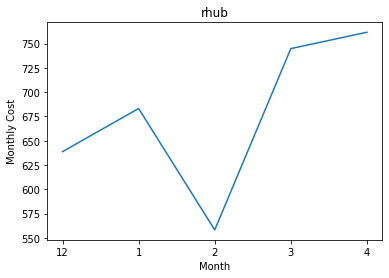

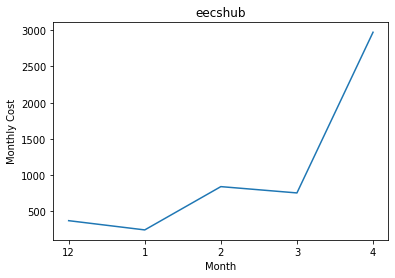

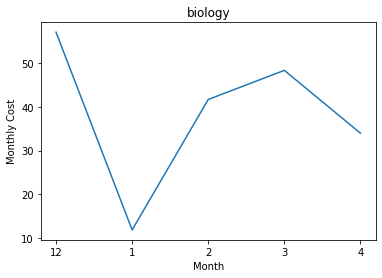

In [310]:
for col in usage_costs_month.columns:
    plt.figure()
    plt.plot([str(i) for i in usage_costs_month.index.values], usage_costs_month[col], label = col)
    plt.xlabel("Month")
    plt.ylabel("Monthly Cost")
    plt.title(col);

## USERS

Will try to analysze costs and why they increase. Metrics like Cost per user, Memory Usage per user, etc.

In [311]:
# Loading the active users for hubs
users = []
for hub in hubs:
    l = listdir("../data/grafana/" + hub)
    name = [i for i in l if 'running' in i][0]
    temp = pd.read_csv("../data/grafana/" + hub + "/" + name)
    
    assert temp.columns[0] == 'Time'
    assert temp.columns[1] == 'Active Users'
    
    temp = temp.rename(columns = {"Active Users": hub})
    temp["Time"] = pd.to_datetime(temp["Time"])
    users.append(temp)

In [312]:
for i in range(1, len(users)):
    try:
        assert users[0]["Time"].where(users[0]["Time"].values == users[i]["Time"].values).notna().sum() == 725
    except:
        print(hubs[i])

In [313]:
users_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'],
                                            how='outer'), users)
users_merged["date"] = users_merged.Time.dt.date
users_merged["weekday"] = users_merged.Time.dt.weekday
users_merged

,Time,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,date,weekday
0,2020-11-28 11:00:00,3.0,51.0,81.0,NaN,10.0,16.0,1.0,2020-11-28,5
1,2020-11-28 17:00:00,7.0,94.0,235.0,NaN,21.0,23.0,7.0,2020-11-28,5
2,2020-11-28 23:00:00,4.0,71.0,229.0,NaN,11.0,23.0,5.0,2020-11-28,5
3,2020-11-29 05:00:00,NaN,21.0,63.0,NaN,2.0,8.0,3.0,2020-11-29,6
4,2020-11-29 11:00:00,3.0,51.0,104.0,1.0,27.0,12.0,5.0,2020-11-29,6
...,...,...,...,...,...,...,...,...,...,...
720,2021-05-27 12:00:00,NaN,20.0,8.0,NaN,5.0,1.0,NaN,2021-05-27,3
721,2021-05-27 18:00:00,NaN,19.0,7.0,NaN,6.0,NaN,NaN,2021-05-27,3
722,2021-05-28 00:00:00,2.0,9.0,9.0,1.0,2.0,NaN,NaN,2021-05-28,4
723,2021-05-28 06:00:00,NaN,4.0,3.0,NaN,1.0,NaN,NaN,2021-05-28,4


I will take max reocrded users for a day again. This keeps the unit estimates unbiased.

In [314]:
users_daily_raw = users_merged.groupby("date").sum().drop(columns = ["weekday"])
users_daily_raw["daily_total"] = users_daily_raw.sum(axis = 1)
users_daily_raw = users_daily_raw.reset_index()
users_daily_raw["date"] = pd.to_datetime(users_daily_raw["date"]).dt.date
users_daily_raw

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total
0,2020-11-28,14.0,216.0,545.0,0.0,42.0,62.0,13.0,892.0
1,2020-11-29,8.0,321.0,836.0,19.0,100.0,64.0,24.0,1372.0
2,2020-11-30,17.0,601.0,1245.0,39.0,146.0,283.0,21.0,2352.0
3,2020-12-01,22.0,703.0,333.0,26.0,119.0,228.0,19.0,1450.0
4,2020-12-02,33.0,936.0,415.0,26.0,159.0,293.0,18.0,1880.0
...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.0,74.0,16.0,0.0,16.0,1.0,0.0,107.0
178,2021-05-25,0.0,86.0,23.0,1.0,26.0,2.0,0.0,138.0
179,2021-05-26,0.0,77.0,15.0,0.0,21.0,3.0,0.0,116.0
180,2021-05-27,0.0,62.0,20.0,0.0,17.0,2.0,0.0,101.0


In [315]:
users_daily_raw["month"] = pd.to_datetime(users_daily_raw.date).dt.month
users_daily_raw

,date,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,month
0,2020-11-28,14.0,216.0,545.0,0.0,42.0,62.0,13.0,892.0,11
1,2020-11-29,8.0,321.0,836.0,19.0,100.0,64.0,24.0,1372.0,11
2,2020-11-30,17.0,601.0,1245.0,39.0,146.0,283.0,21.0,2352.0,11
3,2020-12-01,22.0,703.0,333.0,26.0,119.0,228.0,19.0,1450.0,12
4,2020-12-02,33.0,936.0,415.0,26.0,159.0,293.0,18.0,1880.0,12
...,...,...,...,...,...,...,...,...,...,...
177,2021-05-24,0.0,74.0,16.0,0.0,16.0,1.0,0.0,107.0,5
178,2021-05-25,0.0,86.0,23.0,1.0,26.0,2.0,0.0,138.0,5
179,2021-05-26,0.0,77.0,15.0,0.0,21.0,3.0,0.0,116.0,5
180,2021-05-27,0.0,62.0,20.0,0.0,17.0,2.0,0.0,101.0,5


Summing up the users in a month to get monthly users.

In [316]:
users_month = users_daily_raw.iloc[:, 1:10].groupby("month", sort=False).sum().drop(columns = "daily_total").iloc[1:-1]
users_month

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
12,911.0,9046.0,3115.0,403.0,1816.0,1908.0,159.0
1,2349.0,10132.0,5072.0,1095.0,2796.0,2029.0,97.0
2,3962.0,26131.0,14896.0,2770.0,5084.0,11894.0,349.0
3,2733.0,19220.0,7521.0,1618.0,4329.0,8113.0,234.0
4,3632.0,25017.0,9633.0,1859.0,4780.0,15600.0,300.0


In [317]:
usage_costs_month

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
12,120.120555,1677.120438,792.804346,69.736008,638.736966,371.214430,57.127258
1,418.088931,1973.472545,1116.781535,188.466330,683.172113,243.535339,11.823207
2,264.623021,2128.527694,2036.679761,230.005412,558.121942,841.335431,41.716738
3,269.600970,2378.907818,2108.647348,201.460417,744.848753,754.202120,48.392574
4,308.694224,2799.001590,1394.282939,167.895203,761.707541,2972.804061,34.004441


Costs per month / User per month = Cost per user for the month

In [318]:
costs_per_user = pd.DataFrame(np.round(usage_costs_month.values/users_month.values, 3))
costs_per_user.columns = users_month.columns
costs_per_user.index = users_month.index
costs_per_user[2:]

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
2,0.067,0.081,0.137,0.083,0.110,0.071,0.120
3,0.099,0.124,0.280,0.125,0.172,0.093,0.207
4,0.085,0.112,0.145,0.090,0.159,0.191,0.113


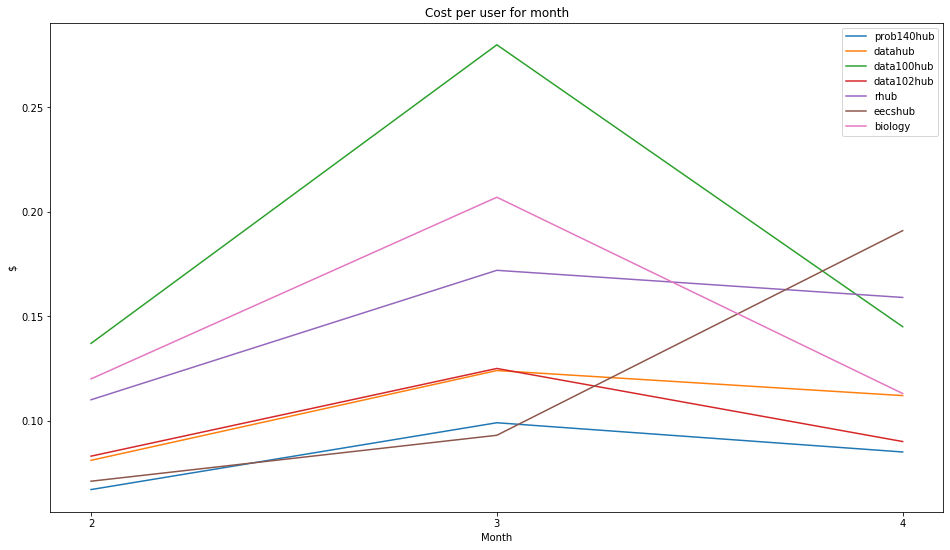

In [319]:
plt.figure(figsize = (16,9))
for col in costs_per_user.columns:
    plt.plot([str(i) for i in costs_per_user.index][2:], costs_per_user[col].values[2:], label = col)
plt.legend()
plt.title("Cost per user for month")
plt.xlabel("Month")
plt.ylabel("$");

data100 cost per user is much higher than any other hub.

data102 and prob140 are tied closely for second

Cost per user is relatively higher on average in march. Will check if this increase is because each user is using more memory or if its a price increase. (i.e. checking if the change in cost per user is due to price or quantity)

In [320]:
# usage per user in gb

usage_per_user_daily = pd.DataFrame(np.round(memory_daily_raw.iloc[:, 1:9].values/users_daily_raw.iloc[:, 1:9].values))/1e+9
usage_per_user_daily.columns = users_daily_raw.iloc[:, 1:9].columns
usage_per_user_daily["date"] = users_daily_raw.date
usage_per_user_daily

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology,daily_total,date
0,0.160060,0.275904,0.529170,NaN,0.405278,0.205162,0.860230,0.438519,2020-11-28
1,0.185293,0.274095,0.518659,0.137083,0.516756,0.216438,0.945157,0.447436,2020-11-29
2,0.200490,0.257099,0.527789,0.158689,0.644367,0.299886,0.788548,0.432277,2020-11-30
3,0.236152,0.284112,0.417150,0.279568,0.493147,0.326887,0.310935,0.338089,2020-12-01
4,0.124601,0.273481,0.388379,0.178666,0.649951,0.248893,0.347164,0.323633,2020-12-02
...,...,...,...,...,...,...,...,...,...
177,NaN,0.213616,0.209869,NaN,0.454676,0.284017,NaN,0.249760,2021-05-24
178,NaN,0.318971,0.360094,0.287293,0.448363,0.103490,NaN,0.346851,2021-05-25
179,NaN,0.390544,0.338487,NaN,0.384890,0.437838,NaN,0.384012,2021-05-26
180,NaN,0.331339,0.260135,NaN,0.362570,0.653214,NaN,0.328870,2021-05-27


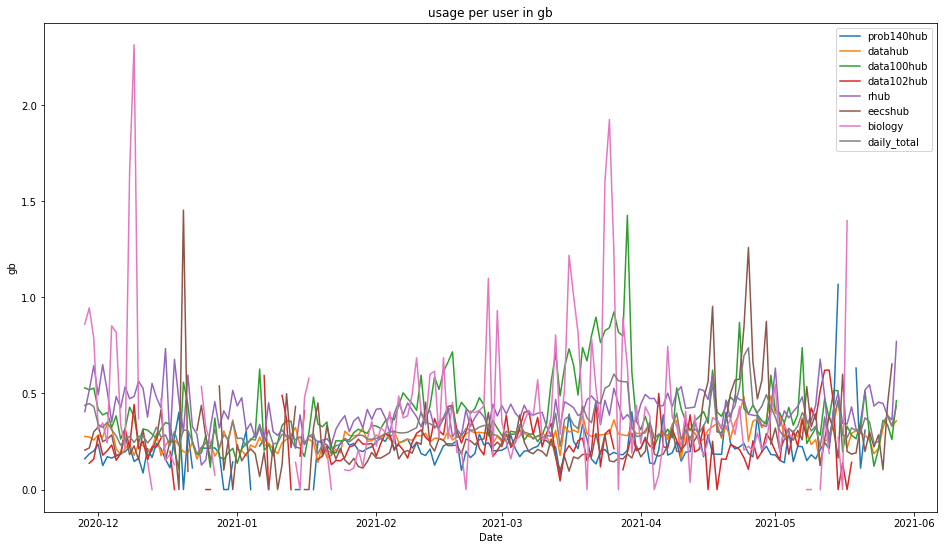

In [321]:
plt.figure(figsize = (16,9))
for col in usage_per_user_daily.columns[:-1]:
    plt.plot(usage_per_user_daily.date, usage_per_user_daily[col].values, label = col)
plt.legend()
plt.title("usage per user in gb")
plt.xlabel("Date")
plt.ylabel("gb");

we can see in above graph that biology usage per user is much higher than other hubs. followed by data100 and rhub
.

lets look at the data monthly to reduce variability

In [322]:
usage_month = memory_daily_raw.iloc[:, 1:10].groupby("month", sort = False).sum().iloc[1:-1].drop(
    columns = "daily_total")/1e+9
usage_month

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
12,165.510525,2310.854160,1092.381430,96.087163,880.096588,511.485276,78.713942
1,536.017080,2530.119582,1431.786238,241.626038,875.870884,312.228073,15.158116
2,907.768492,7301.747089,6986.669969,789.015503,1914.593489,2886.135120,143.105995
3,624.466170,5510.171025,4884.177281,466.634875,1725.263999,1746.928837,112.089825
4,871.696220,7903.870288,3937.200869,474.105450,2150.923252,8394.656784,96.022344


In the above table, we can see that memory usage as an absolute amount has increased this semester for all hubs.

Also note the spike in usage in December.

In [323]:
users_month

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
12,911.0,9046.0,3115.0,403.0,1816.0,1908.0,159.0
1,2349.0,10132.0,5072.0,1095.0,2796.0,2029.0,97.0
2,3962.0,26131.0,14896.0,2770.0,5084.0,11894.0,349.0
3,2733.0,19220.0,7521.0,1618.0,4329.0,8113.0,234.0
4,3632.0,25017.0,9633.0,1859.0,4780.0,15600.0,300.0


monthly usage/ monthy user = usage per user for month

In [325]:
usage_per_user = pd.DataFrame(np.round(usage_month.values/users_month.values, 2))
usage_per_user.columns = users_month.columns
usage_per_user.index = users_month.index
usage_per_user[2:]

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
2,0.23,0.28,0.47,0.28,0.38,0.24,0.41
3,0.23,0.29,0.65,0.29,0.40,0.22,0.48
4,0.24,0.32,0.41,0.26,0.45,0.54,0.32


In most hubs, each user is using more memory. This explains rise in costs per user.

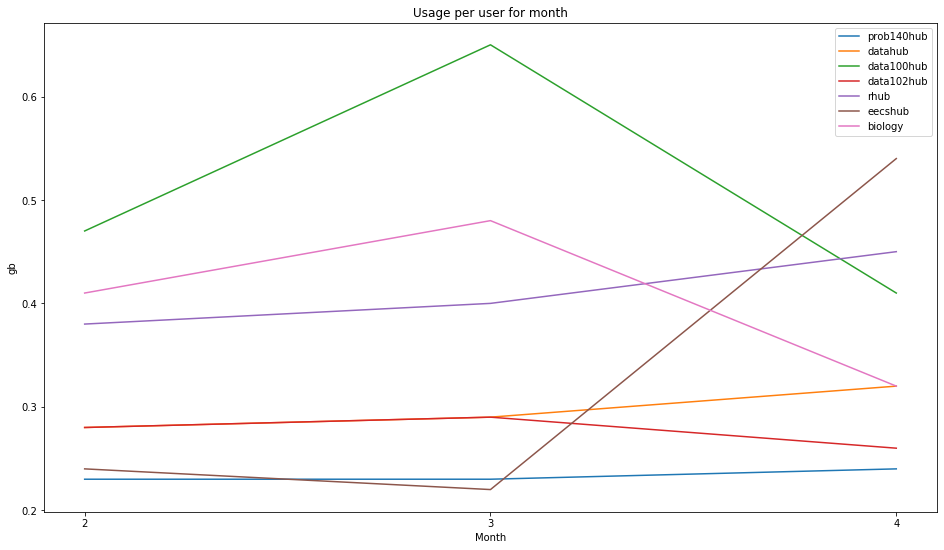

In [326]:
plt.figure(figsize = (16,9))
for col in usage_per_user.columns:
    plt.plot([str(i) for i in usage_per_user.index][2:], usage_per_user[col].values[2:], label = col)
plt.legend()
plt.title("Usage per user for month")
plt.xlabel("Month")
plt.ylabel("gb");

Overall, Total costs are rising quite a lot.

Some of it is explained by rising costs per user as each user uses more RAM. Will check is there are more users as well

In [328]:
users_month[2:]

,prob140hub,datahub,data100hub,data102hub,rhub,eecshub,biology
month,,,,,,,
2,3962.0,26131.0,14896.0,2770.0,5084.0,11894.0,349.0
3,2733.0,19220.0,7521.0,1618.0,4329.0,8113.0,234.0
4,3632.0,25017.0,9633.0,1859.0,4780.0,15600.0,300.0


Here we can see the users have also increasing since last semester

So increase in costs is  driven by by both, increased usage per user and number of users. Impact of Number is users.

EECS has singnificantly increased users.

While biology usage per user is much higher, it has fewest users.

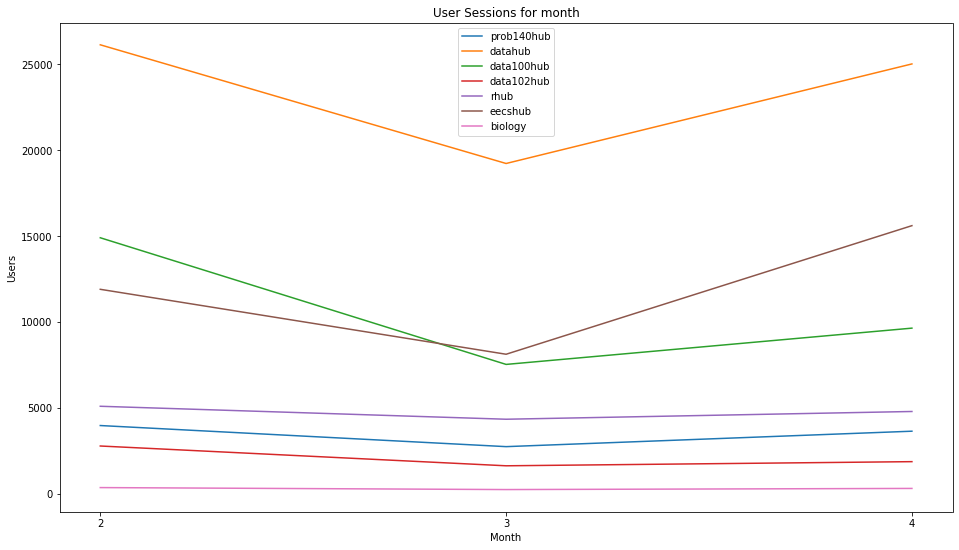

In [330]:
plt.figure(figsize = (16,9))
for col in users_month.columns:
    plt.plot([str(i) for i in users_month.index][2:], users_month[col].values[2:], label = col)
plt.legend()
plt.title("User Sessions for month")
plt.xlabel("Month")
plt.ylabel("Users");